<center><H2> Mini Project 2 - Unsupervised Learning </H2></center><br/>
<center><H2> Student Id: 2021AIML064 </H2></center><br/>

This assignment covers an end-to-end view of clustering and aims to integrate all algorithms learned together into one unified solution.


Dataset Group 2: obesity_dataset.zip Download obesity_dataset.zip


Note: Points will be scaled down to 12 for final marks

Part 1:

Do appropriate EDA, preprocessing, and feature engineering which enhances the data for a clustering formulation  [2 marks]   

Part 2: K-Means

Cluster the data using K-means and use Elbow method to identify a suitable k [3 marks]
Choose a cluster validation metric of your choice and report that for the k found by you in part 1 [1 mark]  

Part 3: Hierarchical clustering

Plot the dendrogram using hierarchical clustering for prepared data. Infer the correct number of clusters based on the dendrogram, and compare it with the k value found in part 1 [3 marks]
Comment why they are same/different [1 mark]
Get cluster labels using hierarchical clustering algorithm and report clustering metric chosen in part 1 for this clustering as well [2 mark]


Part 4: DBSCAN

Experiment with different min_pts and eps values and record number of clusters found in each experiment [4 marks]
For each of the experiments in 1, report cluster validation metric [2 marks]
For the experiment corresponding with best metric value, how does the number of clusters compare with k (found in part 1) and n (found from dendrogram) in part 2? Comment about these values [1 mark]

Part 5: Interpretation and plotting

Choose the labels corresponding to the best clustering (based on metric) from part 2,3,4 and

Reduce the data to 2 dimensions using PCA and plot clusters using color-coded scatter plot [3 marks]
Try to infer and make some observations about the clusters and what business insights can be derived from these results [2 marks]


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from importlib import reload
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import NearestNeighbors
from itertools import product

In [3]:
# load the data set

obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
%matplotlib inline
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

<center><H1> Part 1: EDA and Preprocessing </H1></center><br/>

### Do appropriate EDA, preprocessing, and feature engineering which enhances the data for a clustering formulation  [2 marks]

In [6]:
# drop duplicates
obesity.drop_duplicates(inplace=True)
obesity.shape

(2087, 17)

In [7]:
obesity['Age'] = obesity['Age'].apply(lambda age : round(age)) 
obesity['Height'] = obesity['Height'].apply(lambda height : round(height, 2)) 
obesity['Weight'] = obesity['Weight'].apply(lambda weight : round(weight))

In [8]:
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
obesity.drop_duplicates(inplace=True)

In [11]:
obesity1=obesity.copy()

In [12]:
obesity1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


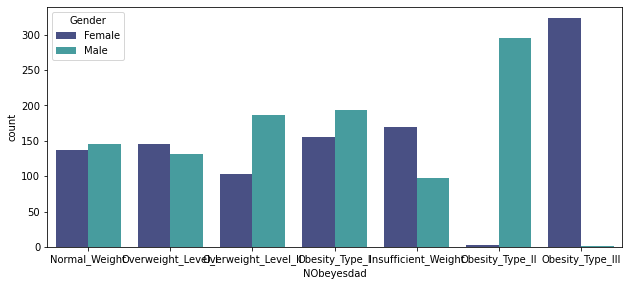

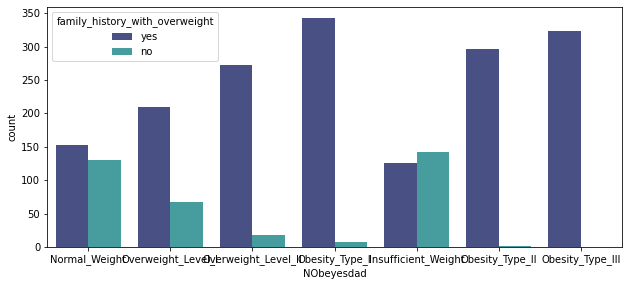

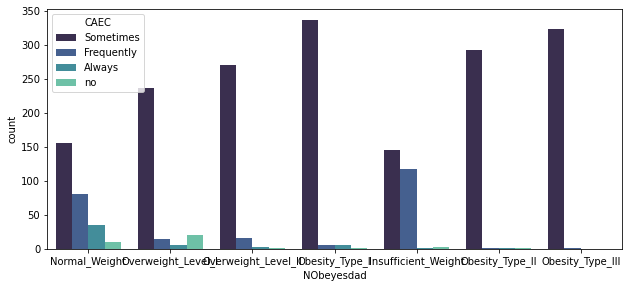

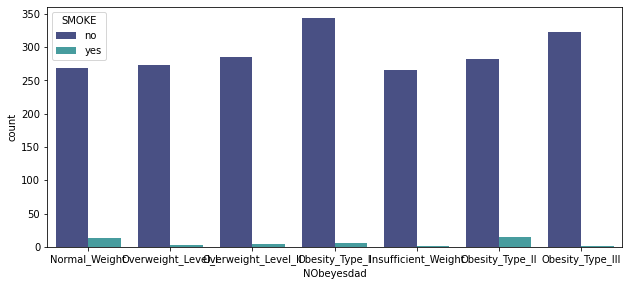

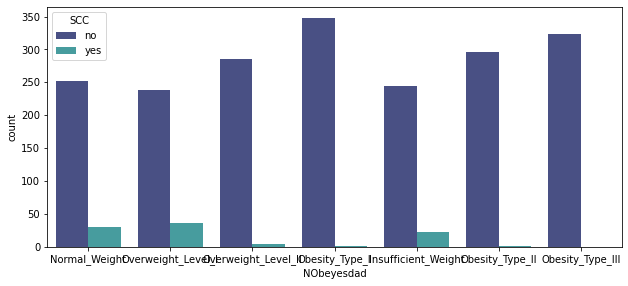

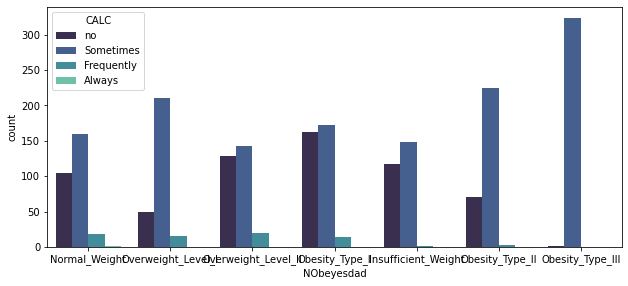

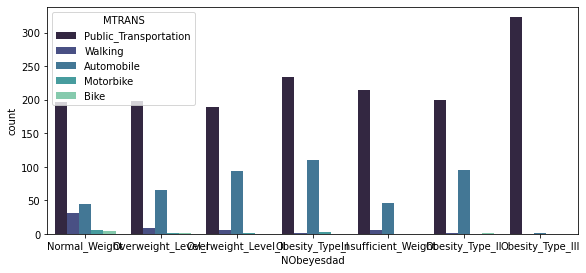

In [13]:

plt.figure(figsize=(35,15))
plt.subplot(331)
sns.countplot(x='NObeyesdad', hue='Gender', data=obesity1, palette='mako')

plt.figure(figsize=(35,15))
plt.subplot(332)
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=obesity1, palette='mako')

plt.figure(figsize=(35,15))
plt.subplot(333)
sns.countplot(x='NObeyesdad', hue='CAEC', data=obesity1, palette='mako')

plt.figure(figsize=(35,15))
plt.subplot(334)
sns.countplot(x='NObeyesdad', hue='SMOKE', data=obesity1, palette='mako')

plt.figure(figsize=(35,15))
plt.subplot(335)
sns.countplot(x='NObeyesdad', hue='SCC', data=obesity1, palette='mako')

plt.figure(figsize=(35,15))
plt.subplot(337)
sns.countplot(x='NObeyesdad', hue='CALC', data=obesity1, palette='mako')

plt.figure(figsize=(35,15))
plt.subplot(338)
sns.countplot(x='NObeyesdad', hue='MTRANS', data=obesity1, palette='mako')


#plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### Converting object type to string 

In [14]:
obesity1['Gender']=obesity1['Gender'].astype(pd.StringDtype())
obesity1['family_history_with_overweight']=obesity1['family_history_with_overweight'].astype(pd.StringDtype())
obesity1['FAVC']=obesity1['FAVC'].astype(pd.StringDtype())
obesity1['SMOKE']=obesity1['SMOKE'].astype(pd.StringDtype())
obesity1['CAEC']=obesity1['CAEC'].astype(pd.StringDtype())
obesity1['SCC']=obesity['SCC'].astype(pd.StringDtype())
obesity1['CALC']=obesity1['CALC'].astype(pd.StringDtype())
obesity1['MTRANS']=obesity1['MTRANS'].astype(pd.StringDtype())
obesity1['NObeyesdad']=obesity1['NObeyesdad'].astype(pd.StringDtype())

In [15]:
obesity1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2085 non-null   string 
 1   Age                             2085 non-null   int64  
 2   Height                          2085 non-null   float64
 3   Weight                          2085 non-null   int64  
 4   family_history_with_overweight  2085 non-null   string 
 5   FAVC                            2085 non-null   string 
 6   FCVC                            2085 non-null   float64
 7   NCP                             2085 non-null   float64
 8   CAEC                            2085 non-null   string 
 9   SMOKE                           2085 non-null   string 
 10  CH2O                            2085 non-null   float64
 11  SCC                             2085 non-null   string 
 12  FAF                             20

### Apply label encoder for categorical varaibles. We can also convert using onehot encoders but due to data sparsity issue, im converting binaries into numeric using Label encoder.

In [16]:
le = LabelEncoder()

obesity1['Gender'] = le.fit_transform(obesity1['Gender'])
obesity1['family_history_with_overweight'] = le.fit_transform(obesity1['family_history_with_overweight'])
obesity1['FAVC'] = le.fit_transform(obesity1['FAVC'])
obesity1['SMOKE'] = le.fit_transform(obesity1['SMOKE'])
obesity1['SCC'] = le.fit_transform(obesity1['SCC'])
obesity1['MTRANS'] = le.fit_transform(obesity1['MTRANS'])
obesity1['CAEC'] = le.fit_transform(obesity1['CAEC'])
obesity1['CALC'] = le.fit_transform(obesity1['CALC'])
obesity1['NObeyesdad'] = le.fit_transform(obesity1['NObeyesdad'])

In [17]:
obesity1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2085 non-null   int32  
 1   Age                             2085 non-null   int64  
 2   Height                          2085 non-null   float64
 3   Weight                          2085 non-null   int64  
 4   family_history_with_overweight  2085 non-null   int32  
 5   FAVC                            2085 non-null   int32  
 6   FCVC                            2085 non-null   float64
 7   NCP                             2085 non-null   float64
 8   CAEC                            2085 non-null   int32  
 9   SMOKE                           2085 non-null   int32  
 10  CH2O                            2085 non-null   float64
 11  SCC                             2085 non-null   int32  
 12  FAF                             20

## This data set is publically available repository and it is observed that  NObeyesdad is the outcome trying to be predicted using the other variables

### For clustering, we will take following approach
1. Use  NObeyesdad as dependent for Feature Selection among other variables
2. Use the best performing feature subset for predicting  NObeyesdad 
3. Drop  NObeyesdad and use the best feature subset to perform clustering
4. Interpret the clusters in the context of obesity prediction

### Use Correlation matrix to figure out correlation of numeric variables Age, Height, Weight with the variable NObeyesdad 

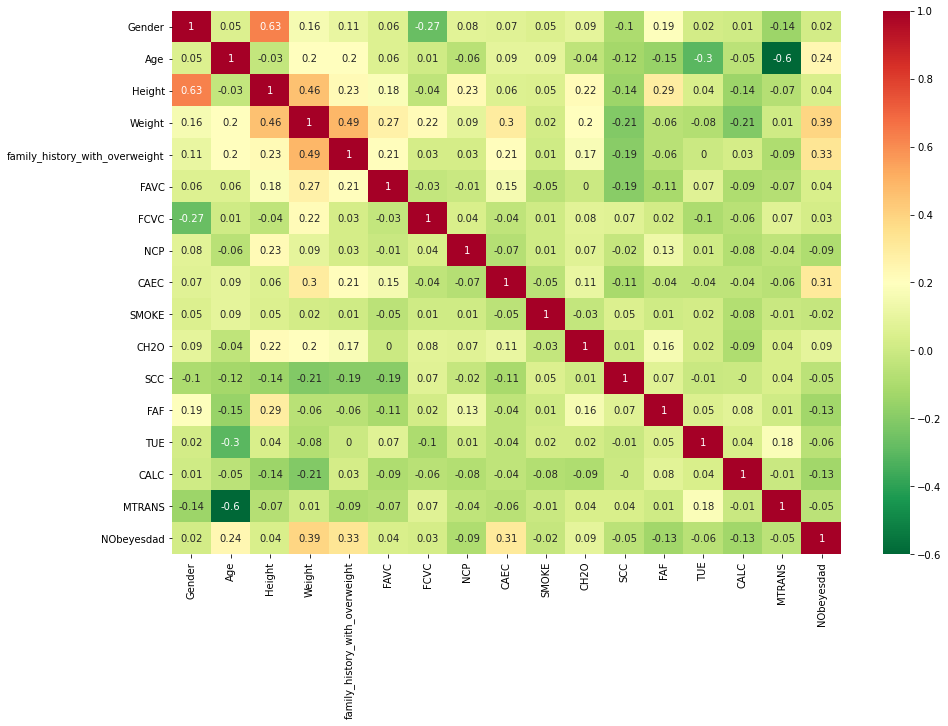

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = obesity1.corr().round(2)

plt.figure(figsize=(15,10))
sns.heatmap(matrix, annot=True, cmap="RdYlGn_r")

plt.show()

### Conclusions from correlations
**considering only age, weight and FCVC from correation matrix  as it has good correlation  with obesity**



### For the other categorical variables in the data set, we have to use ChiSquare Test again and treat NObeyesdad as categorical

In [21]:
cat_var = obesity1[['family_history_with_overweight','Gender', 'FAVC',  'CAEC', 'SMOKE',  'SCC', 'CALC', 'MTRANS']]
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   family_history_with_overweight  2085 non-null   int32
 1   Gender                          2085 non-null   int32
 2   FAVC                            2085 non-null   int32
 3   CAEC                            2085 non-null   int32
 4   SMOKE                           2085 non-null   int32
 5   SCC                             2085 non-null   int32
 6   CALC                            2085 non-null   int32
 7   MTRANS                          2085 non-null   int32
dtypes: int32(8)
memory usage: 146.0 KB


In [23]:
df_dep = obesity1[['NObeyesdad']]
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2110
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NObeyesdad  2085 non-null   int32
dtypes: int32(1)
memory usage: 89.0 KB


## Chi Square test for best features from catogorical variables

In [26]:
# Importing libraries
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [24]:
X = cat_var
y = df_dep
y = y.astype(int)
X = X.astype(int)

In [27]:
chi2_scores, p_values = chi2(X,y)
print("Chi-2 Scores",chi2_scores)
test = SelectKBest(score_func=chi2, k=7)
print("p values",p_values)
fit = test.fit(X, y)
dfsupp=pd.DataFrame(fit.get_support())
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)
Featurescores=pd.concat([dfcolumns,dfscores,dfsupp], axis=1)
Featurescores

Chi-2 Scores [107.98154032 326.16807694  26.90358235  43.41107175  31.13893291
 121.93395404  21.47492225 103.39513883]
p values [5.39261787e-21 2.00733942e-67 1.50955567e-04 9.67120632e-08
 2.38469405e-05 6.39413811e-24 1.50674305e-03 4.90612272e-20]


,0,0,0
0,family_history_with_overweight,107.981540,True
1,Gender,326.168077,True
2,FAVC,26.903582,True
3,CAEC,43.411072,True
4,SMOKE,31.138933,True
5,SCC,121.933954,True
6,CALC,21.474922,False
7,MTRANS,103.395139,True


## Bulding the final data set and Feature Selection
1. We have categorical features in dataset with high spartity.
2. Converting categorical variables with  One hot encoding will increase dimensionality. so converted them using lable encoding
3. Lot of categorical variables are not impacting much on Obesity variable.
4. For Continuous features, used Correlarion Matrix to select best features
5. For categorical, used chi square test to selct best features

In [28]:
# Bulding the final data set

final2 = obesity1[['Weight','family_history_with_overweight','Gender','CAEC','FCVC','Age','FAVC']]


In [29]:
final2.head()

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,64,1,0,2,2.0,21,0
1,56,1,0,2,3.0,21,0
2,77,1,1,2,2.0,23,0
3,87,0,1,2,3.0,27,0
4,90,0,1,2,2.0,22,0


<center><H1>  Part 2: K-Means </H1></center><br/>

In [30]:
# scale features
from sklearn.preprocessing import MinMaxScaler,StandardScaler, normalize
mm = MinMaxScaler()
data_scaled = mm.fit_transform(final2)
data_scaled = pd.DataFrame(data_scaled, columns = list(final2.columns))
print(data_scaled)

        Weight  family_history_with_overweight  Gender      CAEC  FCVC  \
0     0.186567                             1.0     0.0  0.666667   0.5   
1     0.126866                             1.0     0.0  0.666667   1.0   
2     0.283582                             1.0     1.0  0.666667   0.5   
3     0.358209                             0.0     1.0  0.666667   1.0   
4     0.380597                             0.0     1.0  0.666667   0.5   
...        ...                             ...     ...       ...   ...   
2080  0.686567                             1.0     0.0  0.666667   1.0   
2081  0.708955                             1.0     0.0  0.666667   1.0   
2082  0.708955                             1.0     0.0  0.666667   1.0   
2083  0.701493                             1.0     0.0  0.666667   1.0   
2084  0.701493                             1.0     0.0  0.666667   1.0   

           Age  FAVC  
0     0.148936   0.0  
1     0.148936   0.0  
2     0.191489   0.0  
3     0.276596   0.

In [31]:
df_final=data_scaled
df_final.head()

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,0.186567,1.0,0.0,0.666667,0.5,0.148936,0.0
1,0.126866,1.0,0.0,0.666667,1.0,0.148936,0.0
2,0.283582,1.0,1.0,0.666667,0.5,0.191489,0.0
3,0.358209,0.0,1.0,0.666667,1.0,0.276596,0.0
4,0.380597,0.0,1.0,0.666667,0.5,0.170213,0.0


## Part 2: K-Means 
### 1.Cluster the data using K-means and use Elbow method to identify a suitable k [3 marks]

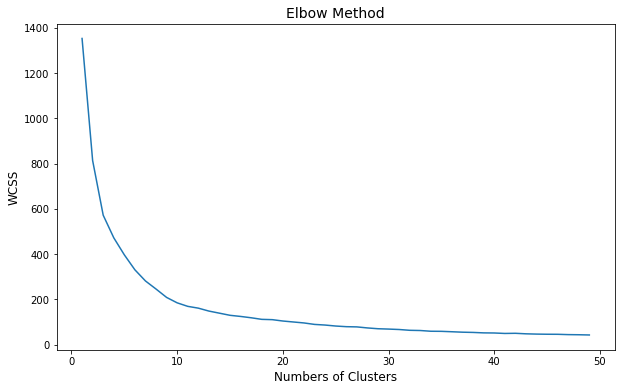

In [26]:
#Elbow Method: is use to find out the number of clusters in K-means
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1,50), wcss)
plt.xlabel('Numbers of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method', fontsize=14)
plt.show()

In [27]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5,6,7,8, 9,10, 15, 20, 25, 30, 35, 40]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(df_final)          # fit model on dataset, this will find clusters based on parameter p
    ss = silhouette_score(df_final, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p


Parameter: {'n_clusters': 2} Score 0.4327286141364759
Parameter: {'n_clusters': 3} Score 0.4854568548299041
Parameter: {'n_clusters': 4} Score 0.5134819312042733
Parameter: {'n_clusters': 5} Score 0.5473419568047394
Parameter: {'n_clusters': 6} Score 0.5062728482560095
Parameter: {'n_clusters': 7} Score 0.5280142897977314
Parameter: {'n_clusters': 8} Score 0.5493094229415756
Parameter: {'n_clusters': 9} Score 0.4513175061212776
Parameter: {'n_clusters': 10} Score 0.46504441677525066
Parameter: {'n_clusters': 15} Score 0.4417441955485343
Parameter: {'n_clusters': 20} Score 0.432174410634286
Parameter: {'n_clusters': 25} Score 0.42582632749435245
Parameter: {'n_clusters': 30} Score 0.44208249511115766
Parameter: {'n_clusters': 35} Score 0.4584977002499307
Parameter: {'n_clusters': 40} Score 0.4634075152806375


## Part 2: K-Means
### 2. Choose a cluster validation metric of your choice and report that for the k found by you in part 1 [1 mark]

**From above Elbow plot, we found best clusters obtained at k=5     
Now fit the model with 5 clusters and print sillhoute score validation metric**

In [28]:

kmeans = KMeans(n_clusters = 5,  random_state = 0)
pred_k = kmeans.fit_predict(df_final)
print(pred_k)

[4 4 2 ... 3 3 3]


In [29]:
# Performance Metrics
kmeans_metrics = silhouette_score(df_final, kmeans.labels_, metric = 'euclidean')
print('The Silhouette_Score of K-means is: {:0.4f}'.format(kmeans_metrics))

The Silhouette_Score of K-means is: 0.5415



<center><H1> Part 3: Hierarchical clustering </H1></center><br/>

## Part 3: Hierarchical clustering

### 1. Plot the dendrogram using hierarchical clustering for prepared data. Infer the correct number of clusters based on the dendrogram, and compare it with the k value found in part 1 [3 marks]

In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import NearestCentroid

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

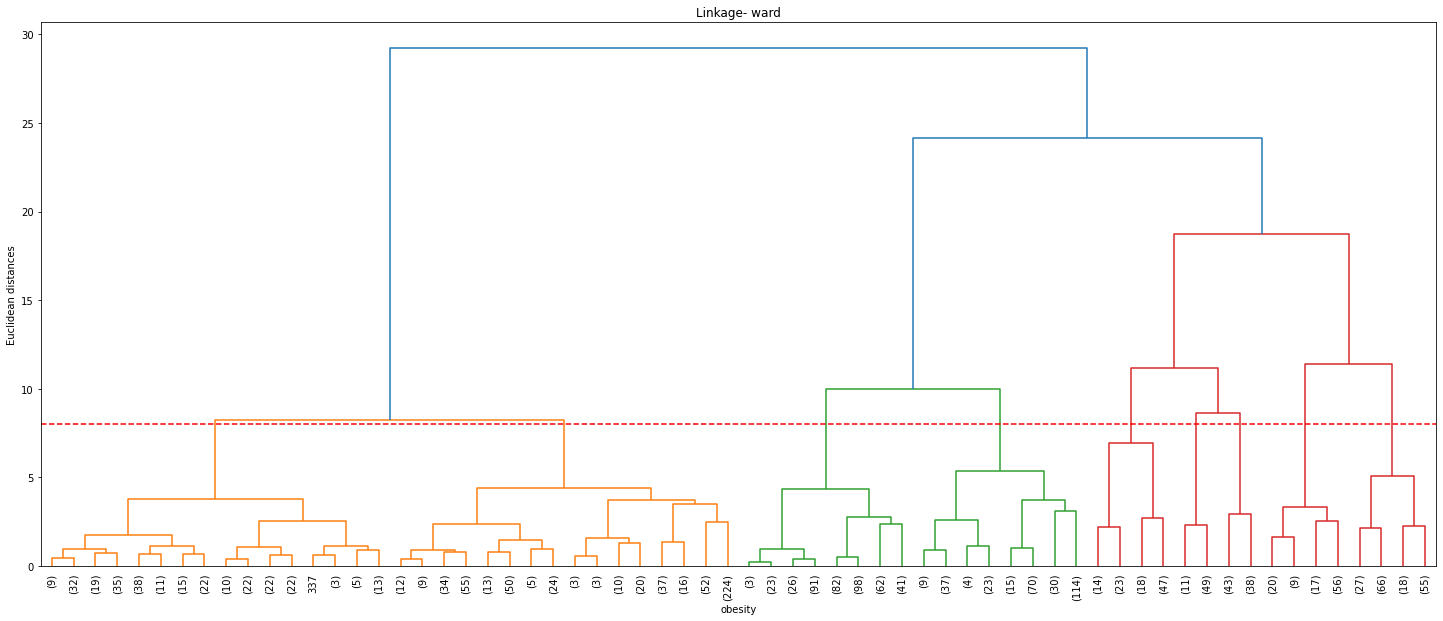

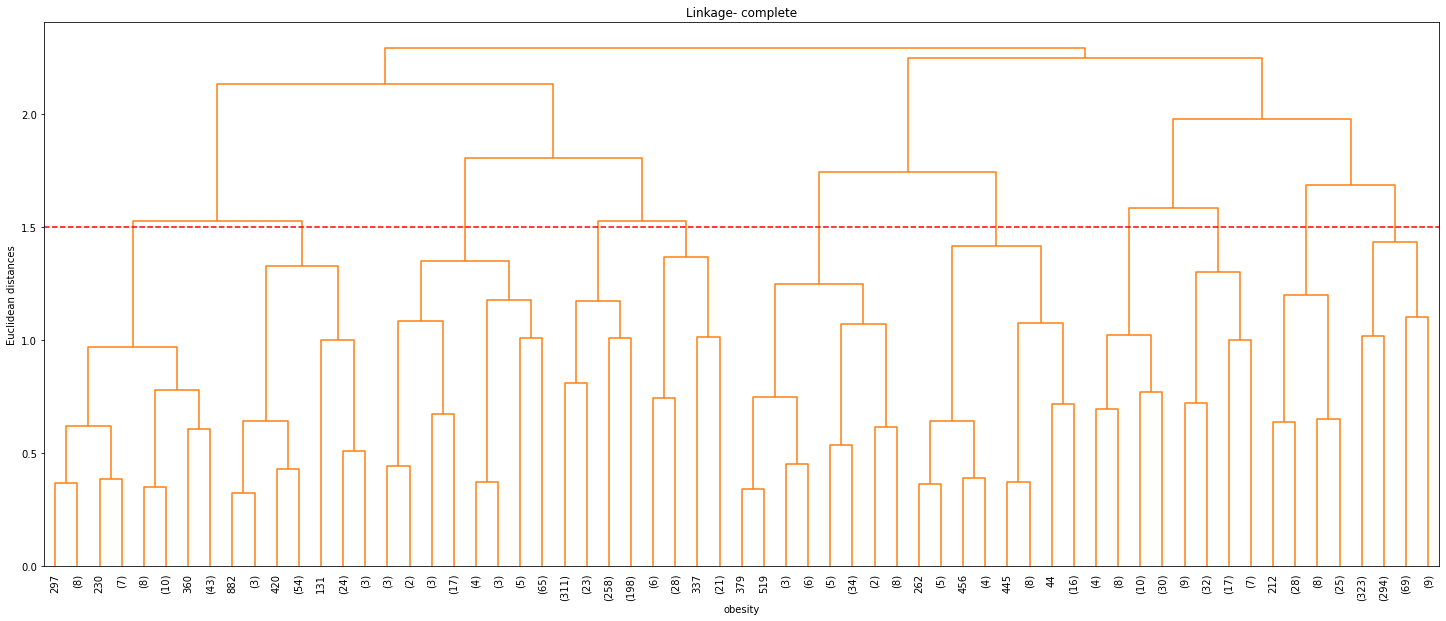

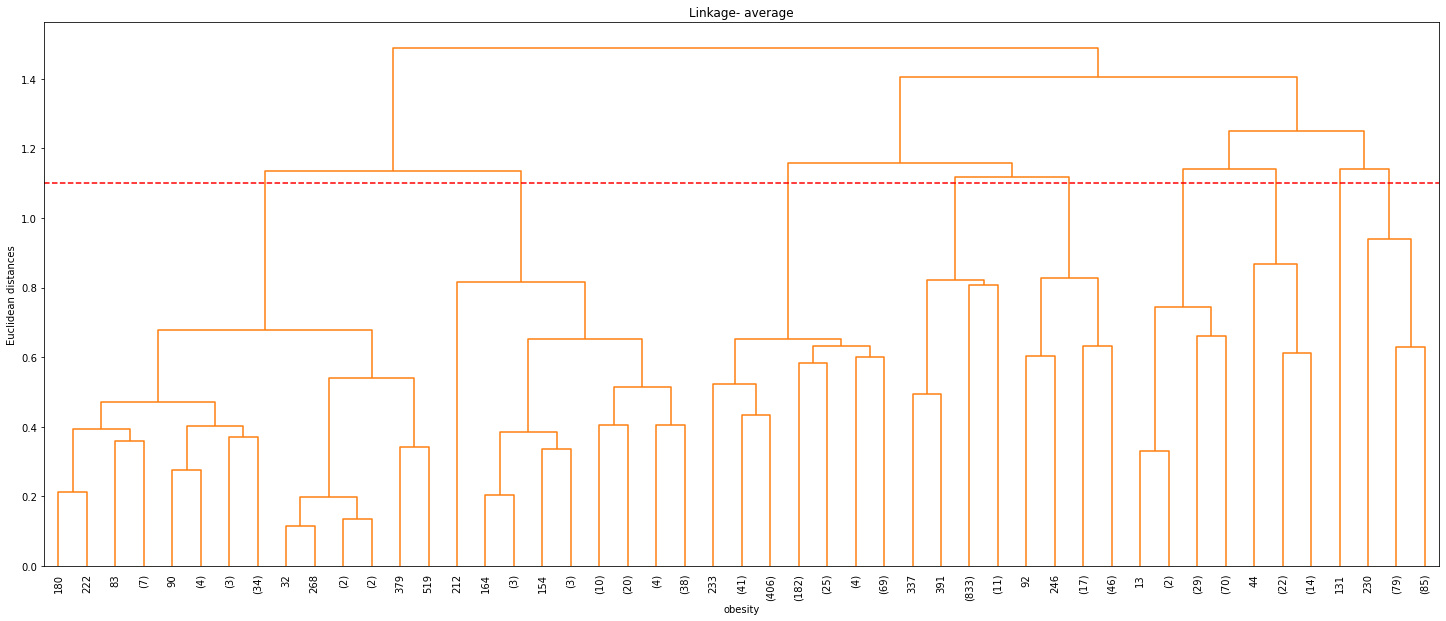

In [31]:
# dendrograms 
# tuple of linkages and suitable cutting height based on exploratory analysis
linkages = (('ward', 8), ('complete', 1.5 ), ('average', 1.1))

for (linkage, cut_height) in linkages:
    Z = sch.linkage(df_final, method  = linkage)
    plt.figure(figsize=(25,10))
    sch.dendrogram(Z, leaf_rotation=90, p=5,color_threshold=20, leaf_font_size=10, truncate_mode='level')
    plt.axhline(y = cut_height, color = 'r', linestyle = 'dashed')
    plt.title('Linkage- ' + linkage)
    plt.xlabel('obesity')
    plt.ylabel('Euclidean distances')
    plt.show()

#### **Major differences between the 3 dendrograms**
- Ward linkage suggests a clear 3 clusters.
- Complete linkage suggests 5 clusters
- Average linkage suggests 4 clusters.
With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.

In [33]:
# clustering (hint: Use AgglomerativeClustering imported above)

from sklearn.metrics import  silhouette_score
from sklearn.neighbors import NearestCentroid

# tuple of linkage type and the suitaable cluster count (k) obtained from the dendrograms
linkages = (('ward', 3), ('complete', 5), ('average', 4))

results = []

for (linkage, k) in linkages: 
    
    # euclidean distance measure
    euclidean = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)
    y_predict = euclidean.fit_predict(df_final)
    silhouette_avg = silhouette_score(df_final, euclidean.labels_)
    
    # get centroids (Cluster means)
    clf = NearestCentroid()
    clf.fit(df_final, y_predict)    
    for idx, centroid in enumerate(clf.centroids_):
            results.append((linkage, k, 'euclidean', idx+1, silhouette_avg) + tuple(centroid))  
            
    if(linkage != 'ward') :
        
        # manhattan distance measure
        manhattan = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage=linkage)
        manhattan.fit(df_final)
        silhouette_avg = silhouette_score(df_final, manhattan.labels_)
        
        # get centroids (Cluster means)
        clf = NearestCentroid()
        clf.fit(df_final, y_predict)    
        for idx, centroid in enumerate(clf.centroids_):
                results.append((linkage, k, 'manhattan', idx+1, silhouette_avg) + tuple(centroid))  
        
        # cosine distance measure
        cosine = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage=linkage)
        cosine.fit(df_final)
        silhouette_avg = silhouette_score(df_final, cosine.labels_)
        
        # get centroids (Cluster means)
        clf = NearestCentroid()
        clf.fit(df_final, y_predict)    
        for idx, centroid in enumerate(clf.centroids_):
                results.append((linkage, k, 'cosine', idx+1, silhouette_avg) + tuple(centroid))  

# add cluser means for each column to the table
dfh = pd.DataFrame(results, columns =['Linkage', 'Cluster count', 'Distance measure', 'Cluster no.', 'Silhouette score'] + list(df_final.columns)) 

# display parameters used, cluster quality, and cluster means
display( dfh )

,Linkage,Cluster count,Distance measure,Cluster no.,Silhouette score,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,ward,3,euclidean,1,0.458273,0.177849,0.285714,0.399217,0.567515,0.690439,0.177957,0.524462
1,ward,3,euclidean,2,0.458273,0.419172,1.000000,1.000000,0.637510,0.642098,0.234546,1.000000
2,ward,3,euclidean,3,0.458273,0.410786,1.000000,0.000000,0.630495,0.805316,0.233692,1.000000
3,complete,5,euclidean,1,0.509419,0.399348,0.892405,1.000000,0.632911,0.639380,0.229935,1.000000
4,complete,5,euclidean,2,0.509419,0.401418,1.000000,0.000000,0.632761,0.793087,0.232834,0.961691
5,complete,5,euclidean,3,0.509419,0.144561,0.000000,0.381443,0.467354,0.791999,0.162316,0.000000
6,complete,5,euclidean,4,0.509419,0.096700,0.000000,0.000000,0.568273,0.678561,0.142143,1.000000
7,complete,5,euclidean,5,0.509419,0.273696,1.000000,0.555556,0.595442,0.737918,0.221495,0.000000
8,complete,5,manhattan,1,0.541532,0.399348,0.892405,1.000000,0.632911,0.639380,0.229935,1.000000
9,complete,5,manhattan,2,0.541532,0.401418,1.000000,0.000000,0.632761,0.793087,0.232834,0.961691


## Part 3: Hierarchical clustering

### 2.Comment why they are same/different [1 mark]

**Best clusters obtained  at k=5 with good sillhoute scores.**                  
1.Same results obtained with Hierarchal aswell.         
2.We are using set same distance based algorithms and same features on both cases hence got same clusters.           
3. Silhoutte score is good comapred with Kmeans


## Part 3: Hierarchical clustering

### 3.Get cluster labels using hierarchical clustering algorithm and report clustering metric chosen in part 1 for this clustering as well [2 mark]

In [35]:
hc1 = AgglomerativeClustering(n_clusters =5, affinity='manhattan', linkage='complete').fit(df_final)
print('Output Clusters are')
df_final['cluster'] = hc1.labels_+1
print(df_final.cluster.value_counts())


Output Clusters are
1    911
5    728
4    166
3    141
2    139
Name: cluster, dtype: int64


In [36]:
# Performance Metrics
hc_metrics = silhouette_score(df_final, hc1.labels_, metric = 'manhattan')
print('The Silhouette_Score of Hierarchical is: {:0.4f}'.format(hc_metrics))

The Silhouette_Score of Hierarchical is: 0.7373


<center><H1> Part 4: DBSCAN </H1></center><br/>

In [58]:
df_final = df_final.drop(['Cluster#'],axis=1)

In [59]:
df_final.shape

(2085, 7)

In [60]:
# Deriving Minpoints
minpoints = 2*df_final.shape[1]
print ('Minpoints = ', minpoints)

Minpoints =  14


## Part 4:   DB Scan
### 1.Experiment with different min_pts and eps values and record number of clusters found in each experiment [4 marks]

In [61]:
from sklearn.neighbors import NearestNeighbors

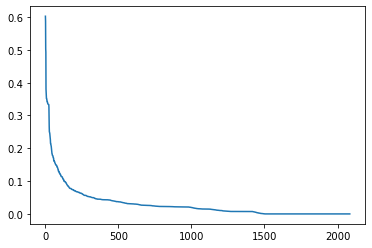

In [62]:
# Deriving eps using NearestNeighbors
neigh = NearestNeighbors(n_neighbors=minpoints)
nbrs = neigh.fit(df_final)
distances, indices = nbrs.kneighbors(df_final)
distances = -np.sort(-distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [63]:
#Experiment 1
# DBSCAN
# Various values of eps and min_samples were tested and the values that gave the best silhouette score result were eps = .5 and min_samples = 15
dbscan1 = DBSCAN(eps = 0.35, min_samples = 14)
dbscan1.fit(df_final)
pred_d1 = dbscan1.labels_
df_final['Cluster#']=pred_d1
df_final['Cluster#'].unique()

array([ 0,  1, -1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [65]:
df_final = df_final.drop(['Cluster#'],axis=1)
df_final.head()

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,0.186567,1.0,0.0,0.666667,0.5,0.148936,0.0
1,0.126866,1.0,0.0,0.666667,1.0,0.148936,0.0
2,0.283582,1.0,1.0,0.666667,0.5,0.191489,0.0
3,0.358209,0.0,1.0,0.666667,1.0,0.276596,0.0
4,0.380597,0.0,1.0,0.666667,0.5,0.170213,0.0


In [66]:
#Experiment 2
# DBSCAN
# Various values of eps and min_samples were tested and the values that gave the best silhouette score result were eps = .5 and min_samples = 15
dbscan2 = DBSCAN(eps = 0.25, min_samples = 35)
dbscan2.fit(df_final)
pred_d2 = dbscan2.labels_
df_final['Cluster#']=pred_d2
df_final['Cluster#'].unique()

array([ 5, -1,  0,  1,  2,  3,  4], dtype=int64)

In [68]:
df_final = df_final.drop(['Cluster#'],axis=1)
df_final.head()

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,0.186567,1.0,0.0,0.666667,0.5,0.148936,0.0
1,0.126866,1.0,0.0,0.666667,1.0,0.148936,0.0
2,0.283582,1.0,1.0,0.666667,0.5,0.191489,0.0
3,0.358209,0.0,1.0,0.666667,1.0,0.276596,0.0
4,0.380597,0.0,1.0,0.666667,0.5,0.170213,0.0


In [69]:
#Experiment 3
# DBSCAN
# Various values of eps and min_samples were tested and the values that gave the best silhouette score result were eps = .5 and min_samples = 15
dbscan3 = DBSCAN(eps = 0.15, min_samples = 30)
dbscan3.fit(df_final)
pred_d3 = dbscan3.labels_
df_final['Cluster#']=pred_d3
df_final['Cluster#'].unique()

array([-1,  2,  0,  1,  3,  5,  4,  6], dtype=int64)

In [71]:
df_final = df_final.drop(['Cluster#'],axis=1)
df_final.head()

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,0.186567,1.0,0.0,0.666667,0.5,0.148936,0.0
1,0.126866,1.0,0.0,0.666667,1.0,0.148936,0.0
2,0.283582,1.0,1.0,0.666667,0.5,0.191489,0.0
3,0.358209,0.0,1.0,0.666667,1.0,0.276596,0.0
4,0.380597,0.0,1.0,0.666667,0.5,0.170213,0.0


In [72]:
#Experiment 4
# DBSCAN
# Various values of eps and min_samples were tested and the values that gave the best silhouette score result were eps = .5 and min_samples = 15
dbscan4 = DBSCAN(eps = 0.08, min_samples = 30)
dbscan4.fit(df_final)
pred_d4 = dbscan4.labels_
df_final['Cluster#']=pred_d4
df_final['Cluster#'].unique()

array([-1,  1,  0,  2,  3,  4,  6,  5], dtype=int64)

## Part 4: DBSCAN
### 2.For each of the experiments in 1, report cluster validation metric [2 marks]

In [64]:
# Performance Metrics
dbscan_metrics = silhouette_score(df_final, pred_d1, metric = 'euclidean')
print('The Silhouette_Score of DBSCAN is: {:0.2f}'.format(dbscan_metrics))

The Silhouette_Score of DBSCAN is: 0.70


In [67]:
# Performance Metrics
dbscan_metrics = silhouette_score(df_final, pred_d2, metric = 'euclidean')
print('The Silhouette_Score of DBSCAN is: {:0.2f}'.format(dbscan_metrics))

The Silhouette_Score of DBSCAN is: 0.64


In [70]:
# Performance Metrics
dbscan_metrics = silhouette_score(df_final, pred_d3, metric = 'euclidean')
print('The Silhouette_Score of DBSCAN is: {:0.2f}'.format(dbscan_metrics))

The Silhouette_Score of DBSCAN is: 0.62


In [73]:
# Performance Metrics
dbscan_metrics = silhouette_score(df_final, pred_d4, metric = 'euclidean')
print('The Silhouette_Score of DBSCAN is: {:0.2f}'.format(dbscan_metrics))

The Silhouette_Score of DBSCAN is: 0.46


## Part 4: DBSCAN
### 3. For the experiment corresponding with best metric value, how does the number of clusters compare with k (found in part 1) and n (found from dendrogram) in part 2? Comment about these values [1 mark]

### Out of 4 experiments , we found best clusters  at 0.35 eps with 14 min points.
1. No of clusters are 7 with DB Scan whereas KMeans and Hierarchal algorithms have got 5 clusters but silhouette scores are different.       
2. 5 clusters seems to be good for the variables that have been used for modelling.    
3. Though we have categorical variables,we have converted them as numerics so distance based algorithms worked in same way.
**Hierarchal has best silhouette score of 0.73 so we will build final model with AgglomerativeClustering**

 
<center><H1>Part 5: Interpretation and plotting </H1></center><br/>

###  1.Reduce the data to 2 dimensions using PCA and plot clusters using color-coded scatter plot [3 marks]

In [74]:
df_final = df_final.drop(['Cluster#'],axis=1)
df_final.head()

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,0.186567,1.0,0.0,0.666667,0.5,0.148936,0.0
1,0.126866,1.0,0.0,0.666667,1.0,0.148936,0.0
2,0.283582,1.0,1.0,0.666667,0.5,0.191489,0.0
3,0.358209,0.0,1.0,0.666667,1.0,0.276596,0.0
4,0.380597,0.0,1.0,0.666667,0.5,0.170213,0.0


In [75]:

# Reduce the dimensionality of data containing original standardized variables to 2 features
#
pca2 = PCA(n_components=2)
df_pca2 = pca2.fit_transform(df_final)
df_pca2 = pd.DataFrame(df_pca2)
df_pca2.columns = ['P1', 'P2']
#


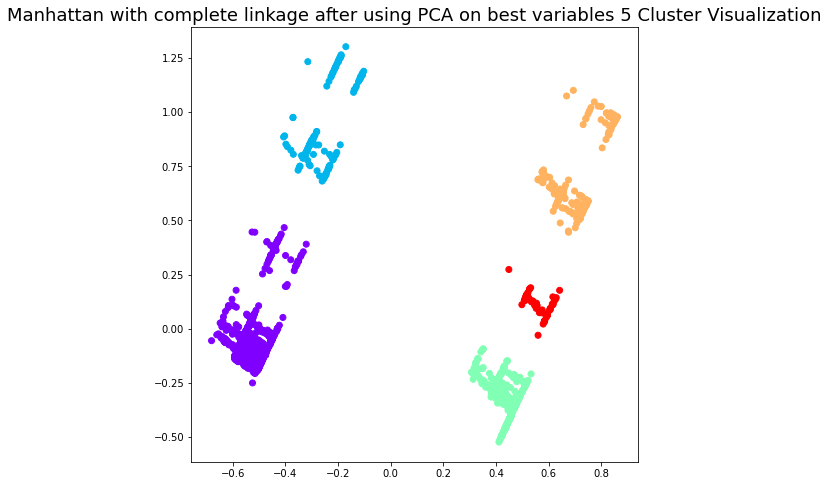

Silhouette-Score for 5 clusters , Manhattan with complete linkage after using PCA on best variables 0.8952555422473603


In [76]:

agc = AgglomerativeClustering(n_clusters = 5, affinity='manhattan', linkage='complete')
plt.figure(figsize =(8, 8))
plt.scatter(df_pca2['P1'], df_pca2['P2'], c = agc.fit_predict(df_pca2), cmap ='rainbow')
plt.title("Manhattan with complete linkage after using PCA on best variables 5 Cluster Visualization", fontsize=18)
plt.show()
preds = pd.Series(AgglomerativeClustering(n_clusters = 5, affinity='manhattan', linkage='complete').fit_predict(df_pca2))
data_p = pd.concat([df_pca2, preds], axis =1)
print('Silhouette-Score for 5 clusters , Manhattan with complete linkage after using PCA on best variables', silhouette_score(data_p,agc.labels_) )

## Silhouette-Score for 5 clusters , Manhattan with complete linkage after using PCA on best variables is 0.89

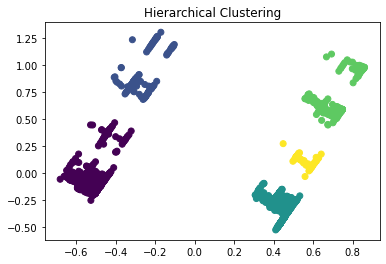

In [77]:

# Hierarchical Clustering
# Suitable number of cluster is 3 as per Silhouette score for complete linkage with Euclidian Distance.
hc = AgglomerativeClustering(n_clusters =5, affinity='manhattan', linkage='complete').fit_predict(df_pca2)
plt.scatter(df_pca2['P1'], df_pca2['P2'], c = hc)
plt.title('Hierarchical Clustering')
plt.show() 


In [78]:
hc1 = AgglomerativeClustering(n_clusters =5, affinity='manhattan', linkage='complete').fit(df_pca2)
print('Output Clusters are')
df_pca2['cluster'] = hc1.labels_+1
df_pca2['cluster'] = hc1.labels_+1
df_pca2['cluster'].value_counts()

Output Clusters are


1    911
3    728
4    226
2    139
5     81
Name: cluster, dtype: int64

In [79]:
# get basic info

pca = PCA()

df_pca = pca.fit_transform(df_final)

n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

PCA Overview
Total: 7 components
----------------------------------------
Mean explained variance: 0.143
----------------------------------------
   explained variance  cumulative
1            0.408081    0.408081
2            0.255217    0.663298
3            0.140091    0.803389
4            0.101946    0.905335
5            0.041463    0.946798
6            0.027638    0.974436
7            0.025564    1.000000
----------------------------------------


Limit scree plot to nth component (0 for all) > 0


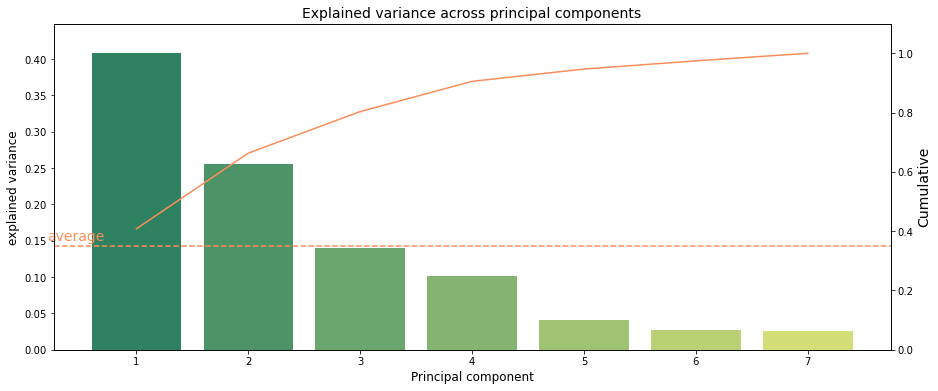

In [80]:
#limit plot to x PC
limit = int(input("Limit scree plot to nth component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components

df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

#make scree plot
fig, ax1 = plt.subplots(figsize=(15,6))

ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)

ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)

ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis

max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))

plt.show()

In [81]:
############### DEFINE PARAMS
top_k = 4
###############

# PCA factor loadings
df_c = pd.DataFrame(abs(pca.components_), columns= df_final.columns)

df_c

,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
0,0.105034,0.226217,0.946012,0.042146,0.168595,0.026282,0.109380
1,0.279544,0.819228,0.251354,0.096415,0.150009,0.070693,0.388261
2,0.022569,0.405107,0.028966,0.021587,0.132984,0.026696,0.903148
3,0.230417,0.215419,0.185875,0.012753,0.928993,0.004822,0.052330
4,0.649652,0.238892,0.067569,0.656548,0.187556,0.181423,0.131034
5,0.399673,0.093139,0.031231,0.646051,0.125649,0.630194,0.017223
6,0.524819,0.037834,0.030873,0.373981,0.131890,0.750677,0.037516


In [97]:
# following code/datapoints canbe used to interpret data from algorithm
dfh1=dfh[(dfh['Linkage']=='complete') & (dfh['Distance measure']=='manhattan')] 
dfh1

,Linkage,Cluster count,Distance measure,Cluster no.,Silhouette score,Weight,family_history_with_overweight,Gender,CAEC,FCVC,Age,FAVC
8,complete,5,manhattan,1,0.541532,0.399348,0.892405,1.000000,0.632911,0.639380,0.229935,1.000000
9,complete,5,manhattan,2,0.541532,0.401418,1.000000,0.000000,0.632761,0.793087,0.232834,0.961691
10,complete,5,manhattan,3,0.541532,0.144561,0.000000,0.381443,0.467354,0.791999,0.162316,0.000000
11,complete,5,manhattan,4,0.541532,0.096700,0.000000,0.000000,0.568273,0.678561,0.142143,1.000000
12,complete,5,manhattan,5,0.541532,0.273696,1.000000,0.555556,0.595442,0.737918,0.221495,0.000000


## 2.Try to infer and make some observations about the clusters and what business insights can be derived from these results [2 marks]


**Interpretation**       
================      
## From algorithm  5 clusters are formed and they are described as interpreted as below

**Cluster: 1**  
Cluster 1 has  911 data points with high weight and with family history in males,with high consumption of high caloric food.    
**Cluster: 2**          
Cluster 2 has 139 points  with highest weight and with family history in females and high consumption of high caloric food.      
**Cluster: 3**        
Cluster 3 contains 728 people with  medium weight with more females than males but does not have family history of overweight, they are lower age individuals.             
**Cluster: 4**        
226 People with lowest weight , family history in females, with lowest amount of high caloric food and with least age are  in cluster 4.          
**Cluster: 5**     
Cluster 5 consists of 81 people with average weight in both males and females with history of overweight, and low on consumption of vegetables.       

Cluster 1 and 2 are similar in many attributes except gender and cluster 1 and 2 also have similar age but the male cluster shows greater frequency of consumption of high caloric food.

**Business Insights**
==================
1. Obesity affects individuals of all gender and ages worldwide; consequently, this clustering helps to define factors causing it. 
2. Unsupervised learning is being utilized in information technology for medical decision-making,such as prognostic and diagnostic problems, and for detecting correlations between the risk factors and outcomes . 
3. Clustering  analyzes many data points to discover unknown patterns and extract hidden information.
4. The descriptive task(Clustering) focuses more on describing the data, grouping it into categories, and summarizing it.On the other hand, the predictive task(Classification) analyzes historical data and produces patterns/conclusions for future predictions.
5. Clustering  case study will be used to analyze patterns among the data given and group people on characterctise and helps to find obesity levels accurately at an early stage as a preventive measure so patients can be diagnised and take necessary measures overcome obesity problem.